<a href="https://colab.research.google.com/github/datuvwxyz/Data-Mining/blob/main/Demo_SVM_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DEMO THUẬT TOÁN SVM BẰNG NGÔN NGỮ PYTHON VỚI BỘ DỮ LIỆU IRIS**

##### **1. Nhiệm vụ:**



*   SVM Intuition (Trực giác)

*   Hard and Soft Margin (Siêu phẳng phân cách)

*   C hyper-parameter (Siêu tham số C)

*   SVM with Linear Dataset (SVM với bộ dữ liệu tuyến tính)

*   SVM with Non-linear Dataset (SVM với bộ dữ liệu phi tuyến tính)

*   Hyper-parameter Tuning & Cross Validation (Điều chỉnh siêu tham số và xác thực chéo)

*   Multi-class SVM (Đa lớp)

*   SVM with Regresion (Hồi quy tuyến tính)







##### **2. Bộ dữ liệu:**

Sử dụng bộ dữ liệu Iris để hoàn thành các nhiệm vụ trên.

Bộ dữ liệu Iris là một trong những bộ dữ liệu phổ biến nhất trong lĩnh vực học máy và thống kê. Nó bao gồm thông tin về ba loài hoa Iris khác nhau: Iris setosa, Iris versicolor và Iris virginica. Mỗi mẫu trong bộ dữ liệu này chứa các đặc trưng của một loài hoa Iris, bao gồm độ dài và độ rộng của cánh hoa và lá hoa.

Thông thường, bộ dữ liệu Iris bao gồm 150 mẫu, mỗi loài có 50 mẫu. Mỗi mẫu được mô tả bằng bốn đặc trưng: độ dài và độ rộng của cánh hoa và lá hoa.

Dưới đây là một số thông tin về các đặc trưng trong bộ dữ liệu Iris:

*  Sepal Length (SL): Độ dài của lá đài (sepal) trong cm.

*  Sepal Width (SW): Độ rộng của lá đài trong cm.

*   Petal Length (PL): Độ dài của cánh hoa (petal) trong cm.

*   Petal Width (PW): Độ rộng của cánh hoa trong cm.

Bộ dữ liệu Iris thường được sử dụng để minh họa các kỹ thuật phân loại và gom cụm trong học máy và thống kê. Đây cũng là một bộ dữ liệu phổ biến cho các bài toán thực hành và giáo dục trong lĩnh vực khoa học dữ liệu và máy học.

# CODE VÀ NHIỆM VỤ

##### IMPORT CÁC THƯ VIỆN CẦN THIẾT

In [ ]:
import numpy as np
import pandas as pd
import itertools

#Thư viện sklearn
from sklearn import datasets
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

#Thư viện vẽ biểu đồ (plotting)
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
from mlxtend.preprocessing import shuffle_arrays_unison

from tqdm.notebook import tqdm_notebook as tqdm
from urllib.request import urlretrieve

iris = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
urlretrieve(iris)
df = pd.read_csv(iris, sep=',', names=["sepal_length", "sepal_width", "petal_length", "petal_width", "class"])

##### HIỂN THỊ 5 DÒNG ĐẦU TIÊN CỦA BỘ DỮ LIỆU

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


##### HIỂN THỊ 5 DÒNG CUỐI CỦA BỘ DỮ LIỆU

In [ ]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


##### MÔ TẢ THỐNG KÊ CHUNG CỦA BỘ DỮ LIỆU

In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


##### HIỂN THỊ THÔNG TIN TỔNG QUAN CỦA BỘ DỮ LIỆU

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


##### Kết quả hiệu xuất của các mô hình dữ liệu



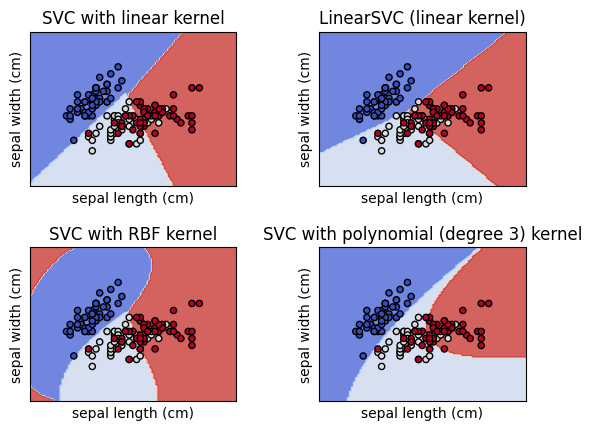

In [ ]:
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn import datasets, svm

iris = datasets.load_iris()
#Lấy hai tính năng đầu tiên
X = iris.data[:, :2]
y = iris.target

#Tạo một ví dụ của SVM và phù hợp với dữ liệu
#Vẽ các vectơ hỗ trợ
C = 1.0  # Tham số chính quy hóa SVM
models = (
    svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C, max_iter=10000),
    svm.SVC(kernel="rbf", gamma=0.7, C=C),
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
)
models = (clf.fit(X, y) for clf in models)

#Tiêu đề cho biểu đồ
titles = (
    "SVC with linear kernel",
    "LinearSVC (linear kernel)",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
)

#Thiết lập lưới 2x2 để vẽ
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]

for clf, title, ax in zip(models, titles, sub.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
    )
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

Nhận xét
*   Phương pháp sử dụng ma trận nhầm lẫn và dữ liệu phân loại là một cách tốt để đánh giá hiệu suất của các mô hình phân loại trên dữ liệu.

*  Việc sử dụng các kernel khác nhau trong SVM giúp mô hình phù hợp với dữ liệu phi tuyến tính.

*  Biểu đồ kết quả cho thấy sự phân loại của các mô hình trên dữ liệu Iris, cung cấp một cái nhìn trực quan về hiệu suất của từng mô hình.

### Bài toán phân loại tuyến tính

<ipython-input-83-a1186ff1df95>:24: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=X[:, 0], y=X[:, 1], palette='Paired', s=30, alpha = 0.8)
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
<ipython-input-83-a1186ff1df95>:24: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=X[:, 0], y=X[:, 1], palette='Paired', s=30, alpha = 0.8)


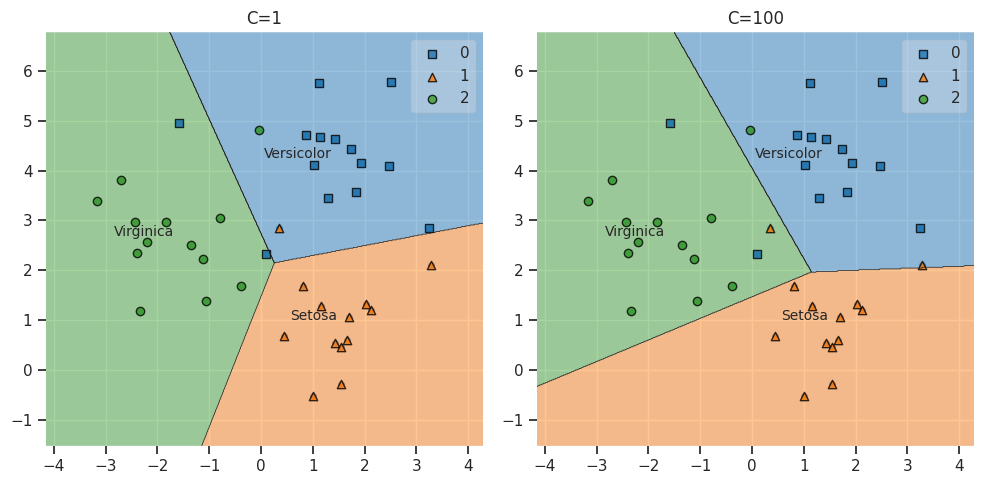

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris, make_blobs
from sklearn.svm import LinearSVC
from mlxtend.plotting import plot_decision_regions

iris = load_iris()
X, y = make_blobs(n_samples=40, centers=3, random_state=0)

# Tạo dictionary chú thích
labels = {0: "Versicolor", 1: "Setosa", 2: "Virginica"}

#Tạo ra một hình ảnh so sánh hai mô hình SVM tuyến tính (LinearSVC) với các giá trị C khác nhau
plt.figure(figsize=(10, 5))
for i, C in enumerate([1, 100]):
    clf = LinearSVC(C=C, loss="hinge", random_state=42).fit(X, y)
    decision_function = clf.decision_function(X)
    support_vector_indices = np.where(np.abs(decision_function) <= 1 + 1e-15)[0]
    support_vectors = X[support_vector_indices]

    plt.subplot(1, 2, i + 1)

    # Sử dụng seaborn scatterplot để vẽ biểu đồ
    sns.scatterplot(x=X[:, 0], y=X[:, 1], palette='Paired', s=30, alpha = 0.8)
    for i in range(3):
        plt.annotate(labels[i], X[y == i, :].mean(axis=0), fontsize=10, ha="right")

    plot_decision_regions(X, y, clf, ax=plt.gca())

    plt.title("C=" + str(C))

plt.tight_layout()
plt.show()

Nhận xét:

* Đoạn code minh họa việc sử dụng mô hình SVM tuyến tính (LinearSVC) để phân loại dữ liệu.

* Các biên quyết định và các vectơ hỗ trợ được vẽ trên các biểu đồ để giúp hiểu rõ cách mô hình SVM hoạt động trên dữ liệu.

* Mã đã sử dụng một cách sắp xếp logic để huấn luyện mô hình và vẽ biểu đồ cho các giá trị C khác nhau, giúp so sánh hiệu suất của mô hình.




### Phân lớp tuyến tính trong không gian trung gian

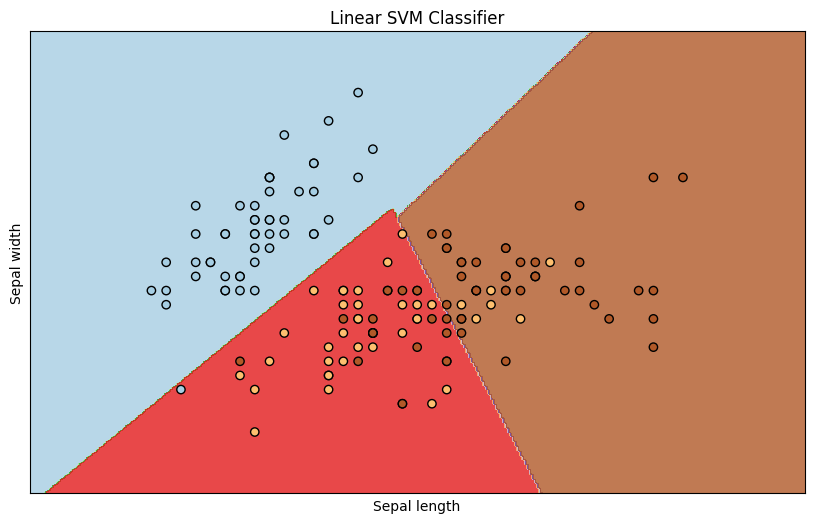

In [ ]:
#Load bộ dữ liệu iris từ thư viện sklearn
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Chọn chỉ hai đặc trưng để dễ dàng hiển thị trên biểu đồ
X = X[:, :2]

# Tiền xử lý dữ liệu: chuẩn hóa dữ liệu
sc = StandardScaler()
X = sc.fit_transform(X)

# Xây dựng mô hình Support Vector Machine (SVM) với kernel tuyến tính
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X, y)

# Hàm để vẽ biểu đồ phân loại trong không gian trung gian
def plot_decision_regions(X, y, classifier):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title('Linear SVM Classifier')

# Vẽ biểu đồ phân loại trong không gian trung gian
plt.figure(figsize=(10, 6))
plot_decision_regions(X, y, classifier=svm_classifier)
plt.show()

Nhận xét:

* Mỗi điểm dữ liệu được sử dụng để đại diện cho một mẫu trong bộ dữ liệu iris.

* Biểu đồ hiển thị đường phân loại của mô hình SVM dưới dạng các đường biên, nơi mà dự đoán thay đổi từ một lớp sang lớp khác.

* Các vùng được tô màu trên biểu đồ phản ánh các vùng không gian mà mô hình SVM dự đoán là thuộc vào một lớp cụ thể.

* Biểu đồ cho thấy rằng mô hình SVM đã tạo ra một ranh giới quyết định khá tốt giữa các lớp dữ liệu iris.

* Biểu đồ cho thấy rằng dữ liệu iris có thể được phân loại một cách tương đối tốt trong không gian hai chiều của các đặc trưng được chọn, đặc biệt là khi sử dụng một mô hình SVM với kernel tuyến tính.

### Bài toán 1 lớp SVM phát hiện phần tử cá biệt bằng bộ dữ liệu iris

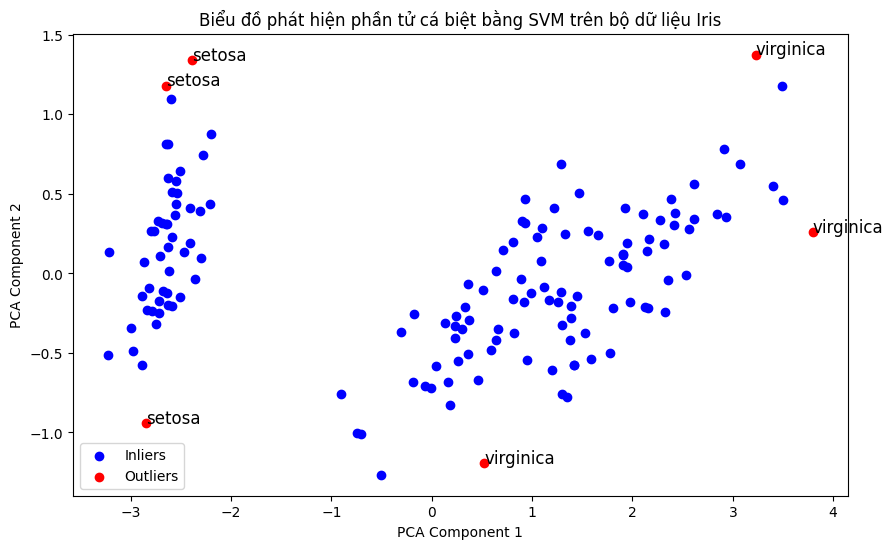

In [ ]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Tạo một mô hình SVM
clf = svm.OneClassSVM(nu=0.05, kernel="rbf", gamma=0.1)

# Huấn luyện mô hình
clf.fit(X)

# Dự đoán các điểm cá biệt
y_pred = clf.predict(X)

# Sử dụng PCA để giảm chiều dữ liệu xuống còn 2 chiều để vẽ biểu đồ
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Tách các điểm cá biệt và không phải cá biệt
outliers_X = X_pca[y_pred == -1]
outliers_y = y[y_pred == -1]
inliers_X = X_pca[y_pred == 1]

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.scatter(inliers_X[:, 0], inliers_X[:, 1], c='b', label='Inliers')
plt.scatter(outliers_X[:, 0], outliers_X[:, 1], c='r', label='Outliers')

# In ra loài mà các điểm cá biệt thuộc vào
for i in range(len(outliers_X)):
    species = iris.target_names[outliers_y[i]]
    plt.text(outliers_X[i, 0], outliers_X[i, 1], species, fontsize=12)

plt.title('Biểu đồ phát hiện phần tử cá biệt bằng SVM trên bộ dữ liệu Iris')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

Nhận xét:

* Biểu đồ đã thể hiện một cách rõ ràng sự phân tách giữa các điểm dữ liệu được xem xét là "các điểm cá biệt" và "không phải các điểm cá biệt". Các điểm cá biệt đã được tô màu đỏ, trong khi các điểm không phải cá biệt được tô màu xanh lam.

* Việc in ra loài tương ứng với mỗi điểm cá biệt cũng là một điểm mạnh, giúp người đọc hiểu rõ hơn về sự phân bố của các điểm cá biệt trong mỗi loài hoa Iris

